In [2]:
!cd /home/sam/dev/ai-internship
!pwd

/home/sam/dev/ai-internship


In [9]:
!pwd

/home/sam/dev/ai-internship/yolov5


In [20]:
!git clone https://github.com/ultralytics/yolov5  # clone

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!git pull 

Already up to date.


In [1]:
%cd yolov5
%pip install -qr requirements.txt  # install

/home/sam/dev/ai-internship/yolov5
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-355-ge5991c9 Python-3.9.0 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7982MiB)


Setup complete ✅ (16 CPUs, 14.9 GB RAM, 123.0/200.3 GB disk)


In [3]:
import torch
from IPython.display import Image, clear_output
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  1.12 ; cuda:  cu113


In [34]:
!python train.py --img 696 --batch 32 --epochs 1 --data /home/sam/dev/ai-internship/yolov5/data/custom_data.yaml --weights yolov5s.pt --nosave --cache

Traceback (most recent call last):
  File "/home/sam/dev/ai-internship/train.py", line 39, in <module>
    import val  # for end-of-epoch mAP
ModuleNotFoundError: No module named 'val'


In [18]:
import os
from sklearn.model_selection import train_test_split

images = [os.path.join('../data/images', x) for x in os.listdir('../data/images')]
annotations = [os.path.join('../data/labels', x) for x in os.listdir('../data/labels')]

#images.sort()
#annotations.sort()

train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [19]:
!mkdir ../data/images/train ../data/images/val ../data/images/test ../data/labels/train ../data/labels/val ../data/labels/test

In [20]:
import shutil

#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        print(f, destination_folder)
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, '../data/images/train')
move_files_to_folder(val_images, '../data/images/val/')
move_files_to_folder(test_images, '../data/images/test/')
move_files_to_folder(train_annotations, '../data/labels/train/')
move_files_to_folder(val_annotations, '../data/labels/val/')
move_files_to_folder(test_annotations, '../data/labels/test/')

../data/images/245.png ../data/images/train
../data/images/207.png ../data/images/train
../data/images/122.png ../data/images/train
../data/images/377.png ../data/images/train
../data/images/349.png ../data/images/train
../data/images/174.png ../data/images/train
../data/images/11.png ../data/images/train
../data/images/416.png ../data/images/train
../data/images/303.png ../data/images/train
../data/images/93.png ../data/images/train
../data/images/298.png ../data/images/train
../data/images/312.png ../data/images/train
../data/images/41.png ../data/images/train
../data/images/164.png ../data/images/train
../data/images/197.png ../data/images/train
../data/images/95.png ../data/images/train
../data/images/92.png ../data/images/train
../data/images/400.png ../data/images/train
../data/images/285.png ../data/images/train
../data/images/23.png ../data/images/train
../data/images/315.png ../data/images/train
../data/images/13.png ../data/images/train
../data/images/354.png ../data/images/t

In [15]:
!mv ../data/annotations ../data/labels

In [21]:
!python train.py --img 520 --batch 25 --epochs 100 --data /home/sam/dev/ai-internship/yolov5/data/custom_data.yaml --weights yolov5s.pt --name yolo_cell_count

train: weights=yolov5s.pt, cfg=, data=/home/sam/dev/ai-internship/yolov5/data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=25, imgsz=520, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_cell_count, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 13 (delta 8), reused 12 (delta 8), pack-reused 0
Unpacking objects: 100% (13/13), 2.81 KiB | 410.00 KiB/s, done.
From https://github.com/ultralytics/yolov5
   13c46bd..3284fe7  classifier -> origin/classifier


In [22]:
!python detect.py --source ../data/images/test --weights runs/train/yolo_cell_count2/weights/best.pt --conf 0.25 --name yolo_cell_count15

detect: weights=['runs/train/yolo_cell_count2/weights/best.pt'], source=../data/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_cell_count15, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-355-ge5991c9 Python-3.9.0 torch-1.12.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7982MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/43 /home/sam/dev/ai-internship/data/images/test/117.png: 480x640 18 cells, Done. (0.008s)
image 2/43 /home/sam/dev/ai-internship/data/images/test/119.png: 480x640 24 cells, Done. (0.005s)
image 3/43 /home/sam/dev/ai-internship/data/images/test/139.png: 480x640 1 cell, Done. (0.006s)
image 4/43 /home/

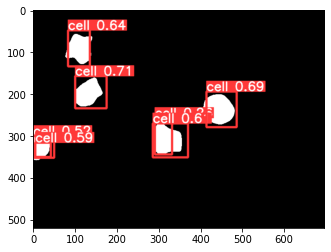

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

detections_dir = "/home/sam/dev/ai-internship/yolov5/runs/detect/yolo_cell_count152/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [64]:
for c, image in enumerate(detection_images):
    detection_images[c] = image[66:74]